In [1]:
import numpy as np
import random
import os
import torch
import matplotlib.pyplot as plt
import torchvision as tv
import torch.nn as nn

In [12]:
def plot_compare(loss_history):
    plt.figure(figsize=(10, 6))
    for model_name, losses in loss_history["Train Loss"].items():
        plt.plot(losses, label=model_name)
    plt.title("Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()


    plt.figure(figsize=(10, 6))
    for model_name, losses in loss_history["Test Loss"].items():
        plt.plot(losses, label=model_name)
    plt.title("Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()


    plt.figure(figsize=(10, 6))
    for model_name, accs in loss_history["Test Acc"].items():
        plt.plot(accs, label=model_name)
    plt.title("Test Acc")
    plt.xlabel("Epoch)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 搭建数据集
train_data = tv.datasets.MNIST(
    root="./mnist_dataset",
    train=True,
    download=True,
    transform=tv.transforms.ToTensor(),
)
test_data = tv.datasets.MNIST(
    root="./mnist_dataset",
    train=False,
    download=True,
    transform=tv.transforms.ToTensor(),
)
batch_size = 64
train_iter = torch.utils.data.DataLoader(
    dataset=train_data, shuffle=True, batch_size=batch_size, num_workers=0
)
test_iter = torch.utils.data.DataLoader(
    dataset=test_data, shuffle=False, batch_size=batch_size, num_workers=0
)

## torch.nn实现dropout

In [3]:
nets = {}
for drop_prob in [0.2, 0.3, 0.5, 0.7, 0.8, 0.9]:
    nets[f"dropout{drop_prob}"] = torch.nn.Sequential(
        nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        nn.Dropout(drop_prob),
        nn.Linear(256, 10),
    ).to(device)
    
loss_function = nn.CrossEntropyLoss()

In [4]:
loss_history = {
    "Train Loss": {},
    "Test Loss": {},
    "Test Acc": {},
}
num_epoch = 30

for name in nets:
    loss_history["Train Loss"][name] = []
    loss_history["Test Loss"][name] = []
    loss_history["Test Acc"][name] = []
    for epoch in range(30):
        net = nets[name]
        optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
        train_loss_epoch, item_cnt =0, 0
        for x, y in train_iter:
            x, y = x.to(device), y.to(device)

            pred = net(x)
            los = loss_function(pred, y)
            los.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_loss_epoch += los.item()
            item_cnt += y.shape[0]
            
        train_loss_epoch /= item_cnt
        loss_history["Train Loss"][name].append(train_loss_epoch)
        with torch.no_grad():
            test_loss_epoch, test_acc_epoch , item_cnt = 0, 0, 0
            for x, y in test_iter:
                x, y = x.to(device), y.to(device)
                pred = net(x)
                los = loss_function(pred, y)
                test_loss_epoch += los.item()
                test_acc_epoch += (pred.argmax(dim=1).long() == y.long()).sum().item()
                item_cnt += y.shape[0]
                
        test_loss_epoch /= item_cnt
        loss_history["Test Loss"][name].append(test_loss_epoch)
        test_acc_epoch /= item_cnt
        loss_history["Test Acc"][name].append(test_acc_epoch)
        print(
            f"Epoch [{epoch + 1}/{num_epoch}], 模型: {name}, 训练损失: {train_loss_epoch:.4f}, 测试损失: {test_loss_epoch:.4f}, 测试准确率: {test_acc_epoch:.4f}"
        )

Epoch [1/30], 模型: dropout0.2, 训练损失: 0.0194, 测试损失: 0.0096, 测试准确率: 0.8505
Epoch [2/30], 模型: dropout0.2, 训练损失: 0.0082, 测试损失: 0.0068, 测试准确率: 0.8819
Epoch [3/30], 模型: dropout0.2, 训练损失: 0.0066, 测试损失: 0.0059, 测试准确率: 0.8929
Epoch [4/30], 模型: dropout0.2, 训练损失: 0.0059, 测试损失: 0.0054, 测试准确率: 0.9038
Epoch [5/30], 模型: dropout0.2, 训练损失: 0.0054, 测试损失: 0.0050, 测试准确率: 0.9103
Epoch [6/30], 模型: dropout0.2, 训练损失: 0.0051, 测试损失: 0.0048, 测试准确率: 0.9145
Epoch [7/30], 模型: dropout0.2, 训练损失: 0.0048, 测试损失: 0.0045, 测试准确率: 0.9194
Epoch [8/30], 模型: dropout0.2, 训练损失: 0.0046, 测试损失: 0.0044, 测试准确率: 0.9185
Epoch [9/30], 模型: dropout0.2, 训练损失: 0.0044, 测试损失: 0.0042, 测试准确率: 0.9222
Epoch [10/30], 模型: dropout0.2, 训练损失: 0.0042, 测试损失: 0.0040, 测试准确率: 0.9290
Epoch [11/30], 模型: dropout0.2, 训练损失: 0.0040, 测试损失: 0.0038, 测试准确率: 0.9307
Epoch [12/30], 模型: dropout0.2, 训练损失: 0.0038, 测试损失: 0.0037, 测试准确率: 0.9306
Epoch [13/30], 模型: dropout0.2, 训练损失: 0.0037, 测试损失: 0.0035, 测试准确率: 0.9361
Epoch [14/30], 模型: dropout0.2, 训练损失: 0.0036, 测试损失: 0.0034, 测

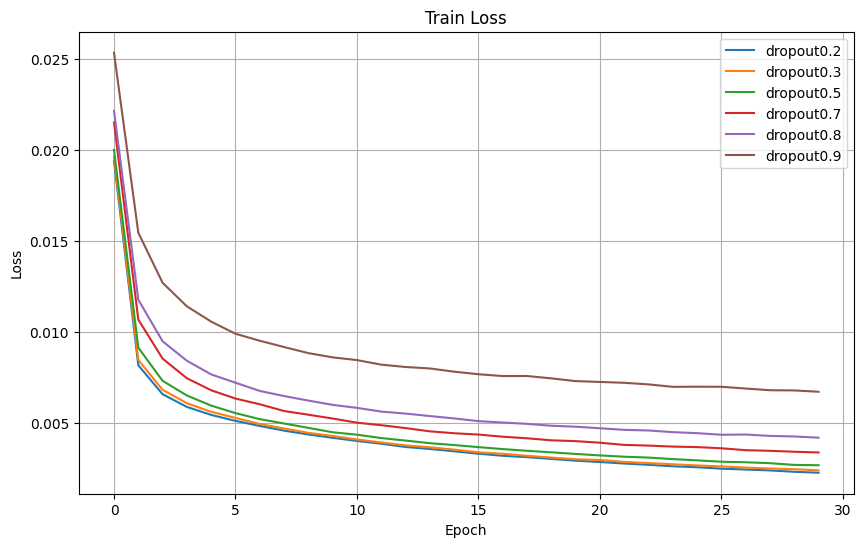

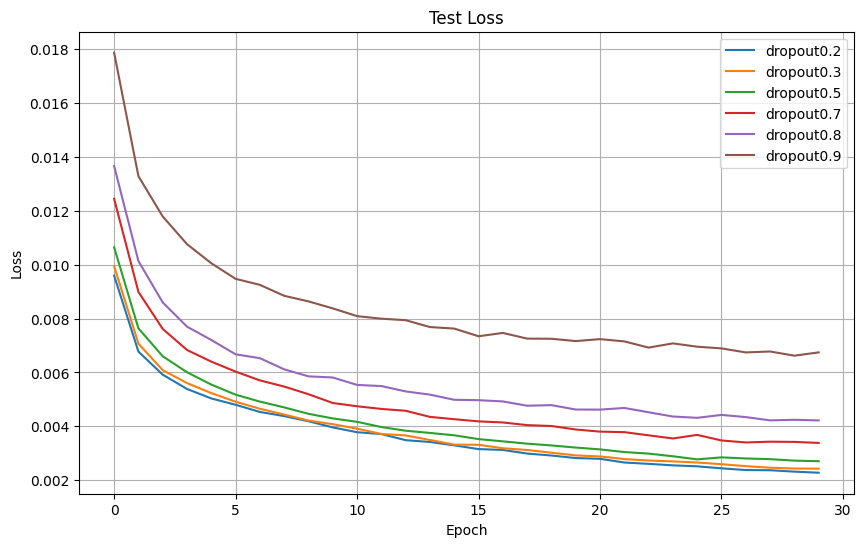

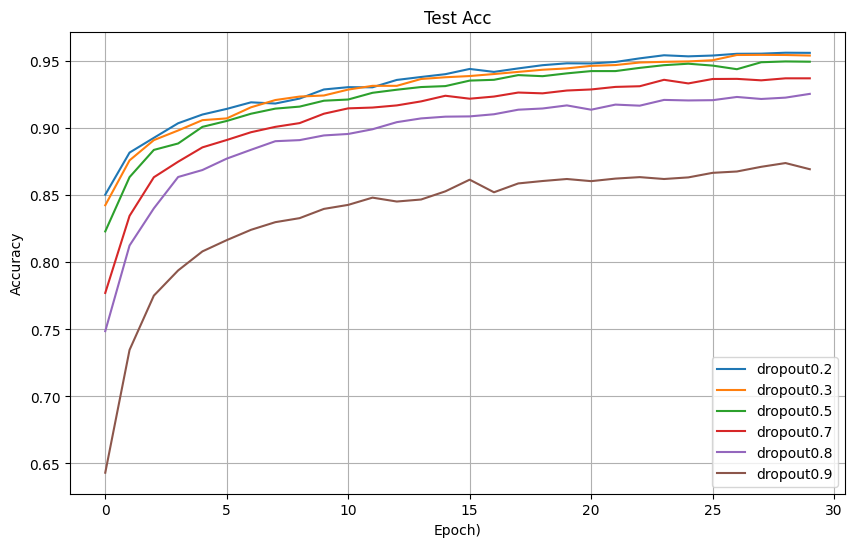

In [ ]:
plot_compare(loss_history)

## 手动实现Dropout

In [ ]:
from torch import Tensor


def dropout_function(x: Tensor, p=0.5, is_training=False):
    if not is_training:
        return x
    prob = torch.rand_like(x)
    # 小于p的丢弃
    mask = (prob > p).float()
    return x * mask / (1 - p)


class MinistForwardNet(nn.Module):
    def __init__(self, dropout_p: float):
        super(MinistForwardNet, self).__init__()

        self.w1 = torch.nn.Parameter(torch.randn(28 * 28, 256))
        self.b1 = torch.nn.Parameter(torch.randn(256))
        self.w2 = torch.nn.Parameter(torch.randn(256, 10))
        self.b2 = torch.nn.Parameter(torch.randn(10))
        self.dropout_p = dropout_p
        torch.nn.init.xavier_normal_(self.w1)
        torch.nn.init.constant_(self.b1, 0.1)
        torch.nn.init.xavier_normal_(self.w2)
        torch.nn.init.constant_(self.b2, 0.1)
        self.params = [self.w1, self.b1, self.w2, self.b2]
        # for param in self.params:
        #     param = param.to(device) # 无效

    def forward(self, x, is_training):
        x = torch.relu(torch.matmul(x, self.w1) + self.b1)
        x = dropout_function(x, p=self.dropout_p, is_training=is_training) 
        x = torch.matmul(x, self.w2) + self.b2
        return x

In [ ]:
nets = {}
for drop_prob in [0, 0.1, 0.3, 0.5, 0.7, 0.9]:
    nets[f"dropout{drop_prob}"] = MinistForwardNet(drop_prob).to(device)

loss_function = nn.CrossEntropyLoss()
loss_history = {
    "Train Loss": {},
    "Test Loss": {},
    "Test Acc": {},
}
num_epoch = 30

for name in nets:
    loss_history["Train Loss"][name] = []
    loss_history["Test Loss"][name] = []
    loss_history["Test Acc"][name] = []
    for epoch in range(30):
        net = nets[name]
        optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
        train_loss_epoch, item_cnt = 0, 0
        for x, y in train_iter:
            x, y = x.to(device), y.to(device)
            x = x.view(-1, 28*28)

            pred = net(x, is_training=True)
            los = loss_function(pred, y)
            los.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_loss_epoch += los.item()
            item_cnt += y.shape[0]

        train_loss_epoch /= item_cnt
        loss_history["Train Loss"][name].append(train_loss_epoch)
        with torch.no_grad():
            test_loss_epoch, test_acc_epoch, item_cnt = 0, 0, 0
            for x, y in test_iter:
                x, y = x.to(device), y.to(device)
                x = x.view(-1, 28*28)
                
                pred = net(x, is_training=False)
                los = loss_function(pred, y)
                test_loss_epoch += los.item()
                test_acc_epoch += (pred.argmax(dim=1).long() == y.long()).sum().item()
                item_cnt += y.shape[0]

        test_loss_epoch /= item_cnt
        loss_history["Test Loss"][name].append(test_loss_epoch)
        test_acc_epoch /= item_cnt
        loss_history["Test Acc"][name].append(test_acc_epoch)
        print(
            f"Epoch [{epoch + 1}/{num_epoch}], 模型: {name}, 训练损失: {train_loss_epoch:.4f}, 测试损失: {test_loss_epoch:.4f}, 测试准确率: {test_acc_epoch:.4f}"
        )

Epoch [1/30], 模型: dropout0.2, 训练损失: 0.0125, 测试损失: 0.0078, 测试准确率: 0.8627
Epoch [2/30], 模型: dropout0.2, 训练损失: 0.0063, 测试损失: 0.0063, 测试准确率: 0.8845
Epoch [3/30], 模型: dropout0.2, 训练损失: 0.0054, 测试损失: 0.0058, 测试准确率: 0.8906
Epoch [4/30], 模型: dropout0.2, 训练损失: 0.0049, 测试损失: 0.0054, 测试准确率: 0.9002
Epoch [5/30], 模型: dropout0.2, 训练损失: 0.0046, 测试损失: 0.0052, 测试准确率: 0.9034
Epoch [6/30], 模型: dropout0.2, 训练损失: 0.0043, 测试损失: 0.0049, 测试准确率: 0.9075
Epoch [7/30], 模型: dropout0.2, 训练损失: 0.0041, 测试损失: 0.0047, 测试准确率: 0.9110
Epoch [8/30], 模型: dropout0.2, 训练损失: 0.0039, 测试损失: 0.0045, 测试准确率: 0.9142
Epoch [9/30], 模型: dropout0.2, 训练损失: 0.0037, 测试损失: 0.0043, 测试准确率: 0.9180
Epoch [10/30], 模型: dropout0.2, 训练损失: 0.0035, 测试损失: 0.0042, 测试准确率: 0.9191
Epoch [11/30], 模型: dropout0.2, 训练损失: 0.0034, 测试损失: 0.0041, 测试准确率: 0.9222
Epoch [12/30], 模型: dropout0.2, 训练损失: 0.0033, 测试损失: 0.0041, 测试准确率: 0.9234
Epoch [13/30], 模型: dropout0.2, 训练损失: 0.0031, 测试损失: 0.0039, 测试准确率: 0.9284
Epoch [14/30], 模型: dropout0.2, 训练损失: 0.0030, 测试损失: 0.0038, 测

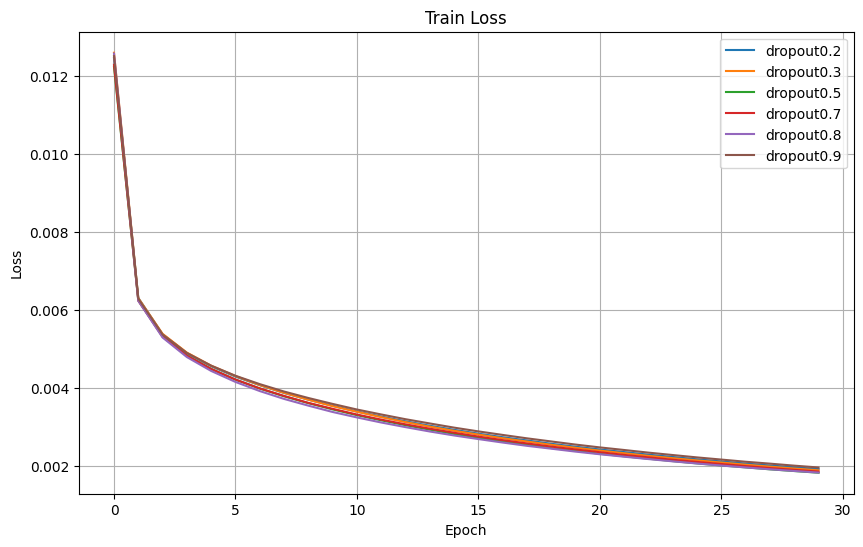

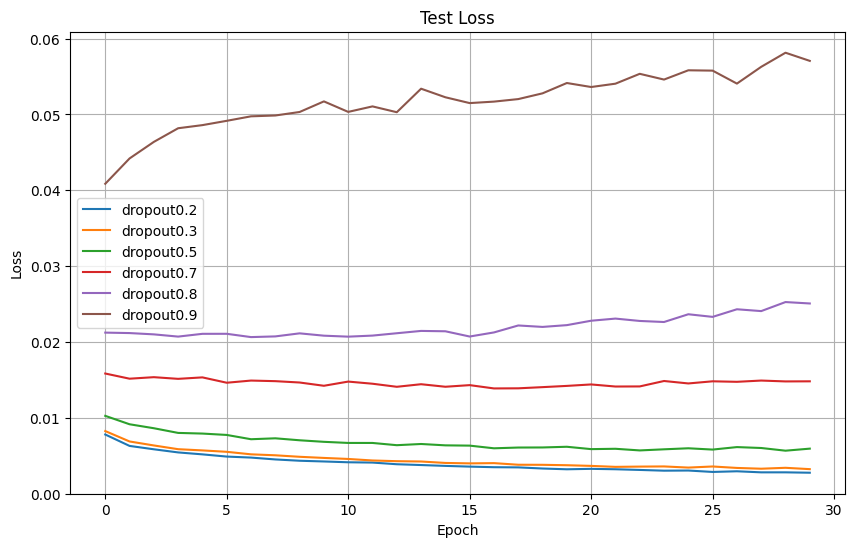

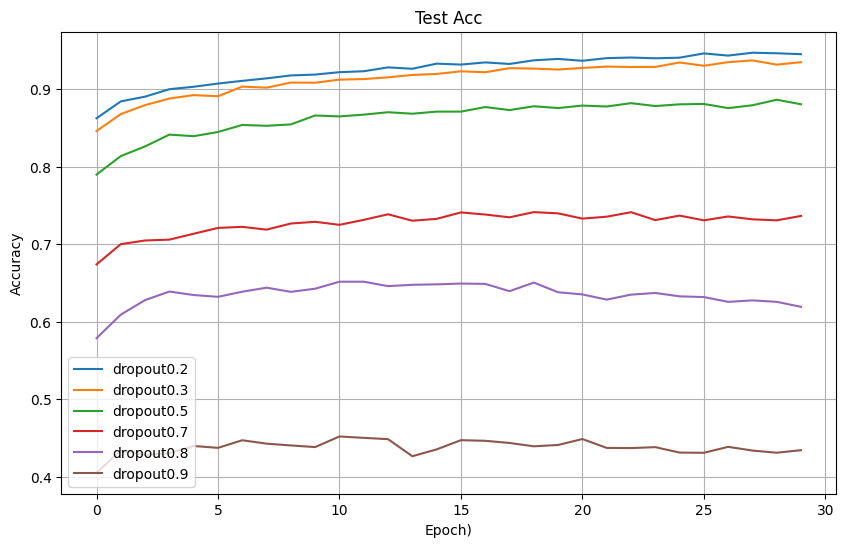

In [13]:
plot_compare(loss_history)

实验结果分析：根据训练集和测试集的损失值曲线，引入drouput机制能够增强模型的泛化能力，避免模型过拟合。不同Dropout率对损失函数曲线的影响也比较明显。较小的Dropout率（如0.2）可能会导致模型过拟合，因为模型的训练损失较低，但测试损失较高。较大的Dropout率（如0.8）可能会导致欠拟合，因为模型的训练损失较高，测试损失也相对较高。适当的Dropout率（如0.4）通常可以达到较好的训练效果。